# Goodreads Book Reviews EDA 
Data source: [https://www.kaggle.com/competitions/goodreads-books-reviews-290312](https://www.kaggle.com/competitions/goodreads-books-reviews-290312)

Data set citation: UCSD Book Graph

* Mengting Wan, Julian McAuley, "Item Recommendation on Monotonic Behavior Chains", in RecSys'18. 
* Mengting Wan, Rishabh Misra, Ndapa Nakashole, Julian McAuley, "Fine-Grained Spoiler Detection from Large-Scale Review Corpora", in ACL'19. 

The task for this challenge is to predict the rating based on the review.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('goodreads-books-reviews/goodreads_train.csv')

In [3]:
train_df.shape

(900000, 11)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [5]:
train_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [6]:
train_df.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

# Ratings and Numeric Features
1: What is the distribution of ratings?

In [7]:
train_df['rating'].describe()

count    900000.000000
mean          3.689639
std           1.252583
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [8]:
train_df['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

Goodreads doesn't actually support zero-star reviews. These are likely missing values where someone writes a review without giving a numeric rating.

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='count'>

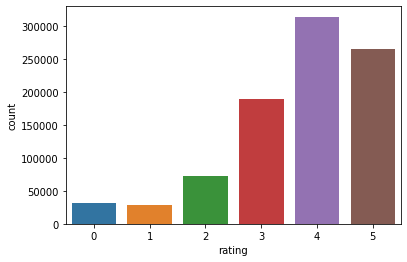

In [44]:
sns.countplot(train_df['rating'])

2: What are the distributions of votes and comments for the reviews?

In [10]:
train_df['n_votes'].describe()

count    900000.000000
mean          3.294381
std          17.873553
min          -3.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        3222.000000
Name: n_votes, dtype: float64

In [11]:
train_df[train_df['n_votes']>0].shape[0]

376820

In [12]:
train_df[train_df['n_votes']<0].shape[0]

46

<AxesSubplot:>

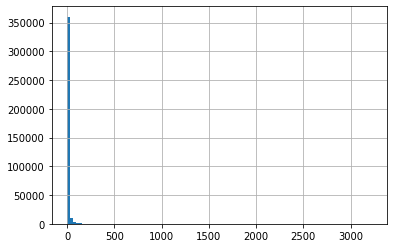

In [13]:
train_df[train_df['n_votes']>0]['n_votes'].hist(bins=100)

In [14]:
train_df['n_comments'].describe()

count    900000.000000
mean          1.016656
std           5.963821
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1335.000000
Name: n_comments, dtype: float64

In [15]:
train_df[train_df['n_comments']>0].shape[0]

145990

In [16]:
train_df[train_df['n_comments']<0].shape[0]

8

In [17]:
train_df[train_df['n_comments']<0]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
13007,feafbae6a2cf100c84a712edd03e930d,1828067,aef92262bb2cda22247768affe7582b9,2,"I haven't had much luck finding new, entertain...",Mon Aug 20 08:45:24 -0700 2012,Mon Aug 20 09:14:14 -0700 2012,Sat Aug 18 00:00:00 -0700 2012,Fri Aug 17 00:00:00 -0700 2012,7,-1
13045,feafbae6a2cf100c84a712edd03e930d,17645,29a5a6522bfc6496ec5a55efedcceef6,3,I finished rereading this and found it conside...,Thu Dec 04 15:29:13 -0800 2008,Sun Jul 26 19:29:33 -0700 2015,Wed Jul 04 00:00:00 -0700 2012,Wed Jul 04 00:00:00 -0700 2012,2,-1
157212,06e1a327fd336d7eee74aa62f1275386,12031532,c1a21535a8c1c180fc5296b47dbc9a78,3,Sometimes it hurts to give a book three stars....,Wed Nov 07 04:20:45 -0800 2012,Mon Nov 19 18:35:57 -0800 2012,Mon Nov 19 00:00:00 -0800 2012,Wed Nov 07 00:00:00 -0800 2012,4,-1
229164,b0ed09d14a462cb2d27327b87edf6f68,13049688,ea18fbf5e281ac1b2651afded38406d9,1,"Not feeling this one. I don't mind dark, but t...",Wed Mar 27 12:52:09 -0700 2013,Fri Nov 25 08:50:17 -0800 2016,NaN,Wed Mar 27 00:00:00 -0700 2013,1,-1
570065,3687fcc87a9c2d733df8cfc43ae8dcfe,26860475,9235c340d5beef19271ba880c9db559b,4,The review is for Life and Death only. \n 3.5/...,Tue Oct 06 16:01:41 -0700 2015,Sun Aug 20 10:41:24 -0700 2017,Fri Oct 09 00:00:00 -0700 2015,Tue Oct 06 00:00:00 -0700 2015,6,-1
622493,26b6d2e8d2c2e2f76a70a3359ba76c6a,17572903,bbcd01ffb27e53927825506ad3346ad5,4,My new historical fiction interest is WWI. \n ...,Wed Jul 31 16:46:13 -0700 2013,Tue Feb 11 20:31:08 -0800 2014,Wed Jul 31 00:00:00 -0700 2013,NaN,9,-1
796721,f2caf50868a530b15ecbb9b3273837e7,13163011,5c237482cc755b72364778bc85b59ce2,3,Enjoyed this more than the first in that the s...,Thu Aug 16 13:45:54 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Thu Aug 16 00:00:00 -0700 2012,1,-1
796728,f2caf50868a530b15ecbb9b3273837e7,4912857,aa057f840d2b35d8551c870299e71fc2,4,"Sometimes when I REALLY enjoy a book, I have t...",Thu Jun 28 10:55:02 -0700 2012,Thu Jul 26 09:06:06 -0700 2012,Wed Jul 11 00:00:00 -0700 2012,Thu Jun 28 00:00:00 -0700 2012,0,-1


<AxesSubplot:>

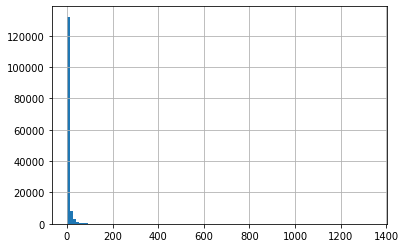

In [18]:
train_df[train_df['n_comments']>0]['n_comments'].hist(bins=100)

3: Interactions with a review may be related to the content of the review, but is there any relationship between rating and the number of votes or comments?

In [19]:
train_df[['rating', 'n_votes', 'n_comments']].corr()

,rating,n_votes,n_comments
rating,1.000000,0.006663,-0.003530
n_votes,0.006663,1.000000,0.626733
n_comments,-0.003530,0.626733,1.000000


In [20]:
train_df.groupby('rating')[['n_votes', 'n_comments']].describe()

n_votes                                                  n_comments  \
           count      mean        std  min  25%  50%  75%     max      count   
rating                                                                         
0        30988.0  4.319349  22.600976 -2.0  0.0  0.0  2.0  1156.0    30988.0   
1        28718.0  5.960513  39.753893  0.0  0.0  0.0  2.0  2549.0    28718.0   
2        72627.0  3.015600  19.962022 -2.0  0.0  0.0  1.0  2245.0    72627.0   
3       188972.0  2.174555  10.735812 -1.0  0.0  0.0  1.0  1710.0   188972.0   
4       313688.0  2.926660  14.350061 -2.0  0.0  0.0  2.0  2333.0   313688.0   
5       265007.0  4.195810  20.396959 -3.0  0.0  0.0  2.0  3222.0   265007.0   

                                                         
            mean        std  min  25%  50%  75%     max  
rating                                                   
0       1.432458  11.662875  0.0  0.0  0.0  0.0  1335.0  
1       2.047566  11.584845 -1.0  0.0  0.0  0.0   564.0  
2       1.070690   6.673441 -1.0  0.0  0.0  0.0   655.0  
3       0.685461   3.931856 -1.0  0.0  0.0  0.0   448.0  
4       0.870923   4.711809 -1.0  0.0  0.0  0.0   660.0  
5       1.250182   6.367146  0.0  0.0  0.0  0.0   833.0

This suggests there is likely no relationship, though we may be able to derive features from these that are more useful.

# Users
1: How many users do we have?

In [21]:
len(train_df['user_id'].unique())

12188

2: How many reviews do we have per user?

In [22]:
user_stats = train_df.groupby('user_id')['book_id'].count().reset_index()

In [23]:
user_stats.head()

,user_id,book_id
0,000a1016fda6008d1edbba720ca00851,78
1,000efb30c5236d7437c3cdf4bf3e4dc7,11
2,0011e1a9112b3d798702ef5b20bbf35b,17
3,0016a8010771c0c00c97f27dfc5cdd22,1
4,0019de4561419b7543238e0979f2f33e,130


In [24]:
user_stats.describe()

,book_id
count,12188.000000
mean,73.843124
std,103.860677
min,1.000000
25%,14.000000
50%,37.000000
75%,92.000000
max,1815.000000


In [25]:
user_stats['book_id'].value_counts()

2      278
3      264
4      260
5      257
1      243
      ... 
761      1
927      1
452      1
520      1
628      1
Name: book_id, Length: 556, dtype: int64

array([[<AxesSubplot:title={'center':'book_id'}>]], dtype=object)

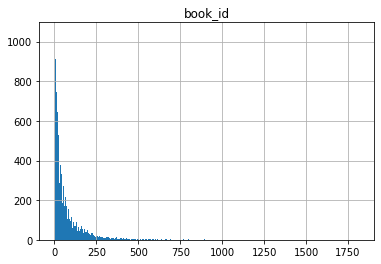

In [26]:
user_stats.hist(bins=500)

<AxesSubplot:ylabel='Frequency'>

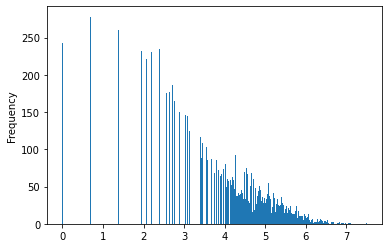

In [27]:
np.log(user_stats['book_id']).plot.hist(bins=500)

2a: How many users have 100 or more reviews?

In [28]:
user_stats[user_stats['book_id']>=100].shape

(2814, 2)

2b: What is the threshold for the top 1%

In [29]:
np.percentile(user_stats['book_id'], 99)

492.0

3: Let's check for duplicates (multiple reviews of the same book by the same user)

In [30]:
review_duplicates = train_df.groupby(['user_id', 'book_id'])['review_id'].count().reset_index()

In [31]:
review_duplicates['review_id'].value_counts()

1    900000
Name: review_id, dtype: int64

Okay, we don't have to worry about duplicates!

4: What is the distribution of average user ratings?

In [32]:
user_stats1 = train_df.groupby('user_id')['rating'].mean().reset_index()
user_stats2 = train_df.groupby('user_id')['rating'].min().reset_index()
user_stats3 = train_df.groupby('user_id')['rating'].max().reset_index()
user_stats4 = train_df.groupby('user_id')['rating'].std().reset_index()

In [33]:
user_stats1.columns = ['user_id', 'mean rating']
user_stats2.columns = ['user_id', 'min rating']
user_stats3.columns = ['user_id', 'max rating']
user_stats4.columns = ['user_id', 'stdev rating']

user_stats = user_stats.merge(user_stats1, how='left', on='user_id')
user_stats = user_stats.merge(user_stats2, how='left', on='user_id')
user_stats = user_stats.merge(user_stats3, how='left', on='user_id')
user_stats = user_stats.merge(user_stats4, how='left', on='user_id')

In [34]:
user_stats.head()

,user_id,book_id,mean rating,min rating,max rating,stdev rating
0,000a1016fda6008d1edbba720ca00851,78,4.076923,0,5,1.170739
1,000efb30c5236d7437c3cdf4bf3e4dc7,11,2.818182,1,5,1.078720
2,0011e1a9112b3d798702ef5b20bbf35b,17,4.000000,2,5,1.000000
3,0016a8010771c0c00c97f27dfc5cdd22,1,5.000000,5,5,NaN
4,0019de4561419b7543238e0979f2f33e,130,2.861538,0,5,1.418340


/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean rating', ylabel='Density'>

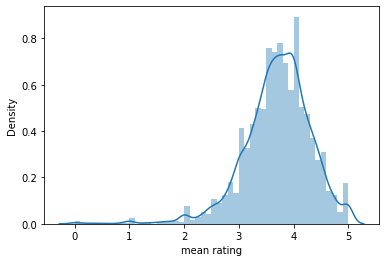

In [35]:
sns.distplot(user_stats['mean rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='min rating', ylabel='count'>

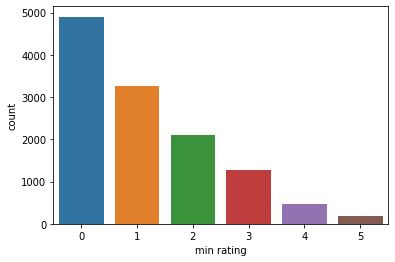

In [36]:
sns.countplot(user_stats['min rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max rating', ylabel='count'>

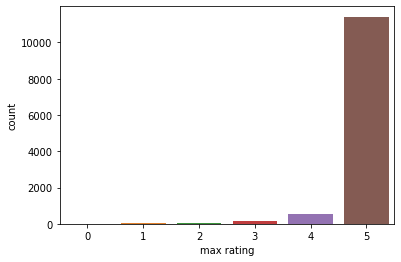

In [37]:
sns.countplot(user_stats['max rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stdev rating', ylabel='Density'>

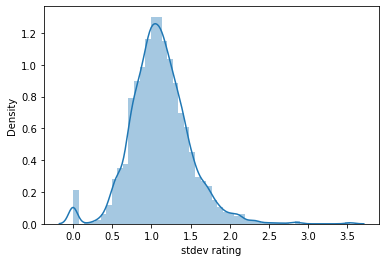

In [38]:
sns.distplot(user_stats['stdev rating'])

4a: For the users who only have one rating, what is that rating?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max rating', ylabel='count'>

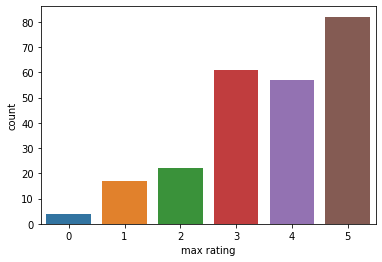

In [43]:
sns.countplot(user_stats[user_stats['book_id']==1]['max rating'])

In [41]:
user_stats[user_stats['book_id']==1]['max rating'].describe()

count    243.000000
mean       3.629630
std        1.309007
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: max rating, dtype: float64

4b: For the users with more than one rating, how many tend to only give positive ratings?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='min rating', ylabel='count'>

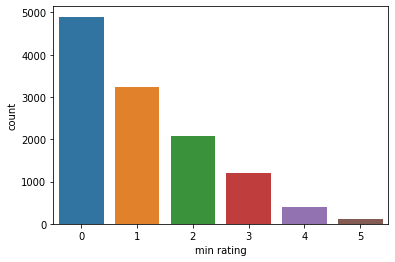

In [45]:
sns.countplot(user_stats[user_stats['book_id']>1]['min rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean rating', ylabel='Density'>

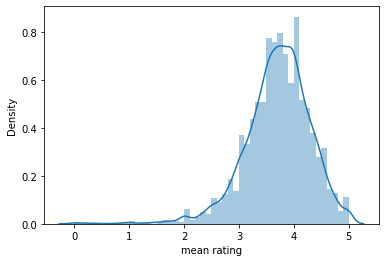

In [48]:
sns.distplot(user_stats[user_stats['book_id']>1]['mean rating'])

4c: For the top 1% of users, is there any skew?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='min rating', ylabel='count'>

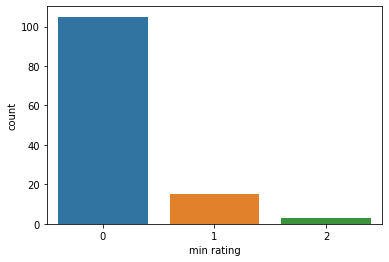

In [46]:
sns.countplot(user_stats[user_stats['book_id']>=492]['min rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean rating', ylabel='Density'>

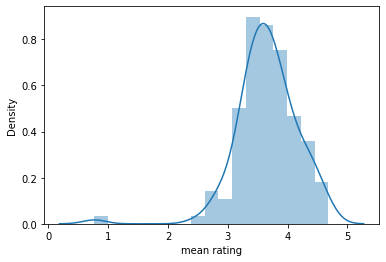

In [49]:
sns.distplot(user_stats[user_stats['book_id']>492]['mean rating'])

There doesn't seem to be a difference in ratings skew for the top 1%

# Books
1: How many books are there?

In [50]:
len(train_df['book_id'].unique())

25474

2: How many ratings are there per book?

(We can also do some prep for looking at the rating values)

In [51]:
book_stats = train_df.groupby('book_id')['rating'].count().reset_index()
book_stats1 = train_df.groupby('book_id')['rating'].mean().reset_index()
book_stats2 = train_df.groupby('book_id')['rating'].min().reset_index()
book_stats3 = train_df.groupby('book_id')['rating'].max().reset_index()
book_stats4 = train_df.groupby('book_id')['rating'].std().reset_index()

In [53]:
book_stats1.columns = ['book_id', 'mean rating']
book_stats2.columns = ['book_id', 'min rating']
book_stats3.columns = ['book_id', 'max rating']
book_stats4.columns = ['book_id', 'stdev rating']

book_stats = book_stats.merge(book_stats1, how='left', on='book_id')
book_stats = book_stats.merge(book_stats2, how='left', on='book_id')
book_stats = book_stats.merge(book_stats3, how='left', on='book_id')
book_stats = book_stats.merge(book_stats4, how='left', on='book_id')

In [54]:
book_stats.head()

,book_id,rating,mean rating,min rating,max rating,stdev rating
0,1,390,4.571795,0,5,0.826131
1,2,410,4.424390,0,5,0.961554
2,3,709,4.521862,0,5,0.841131
3,5,480,4.652083,0,5,0.763053
4,6,446,4.587444,0,5,0.761562


In [58]:
book_stats.describe()

,book_id,rating,mean rating,min rating,max rating,stdev rating
count,2.547400e+04,25474.000000,25474.000000,25474.000000,25474.000000,25470.000000
mean,1.492047e+07,35.330141,3.602529,1.042043,4.899113,1.136359
std,9.740023e+06,67.222413,0.530967,1.208425,0.327535,0.332189
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.155111e+06,10.000000,3.285714,0.000000,5.000000,0.900337
50%,1.598224e+07,17.000000,3.647059,1.000000,5.000000,1.133893
75%,2.274974e+07,34.000000,4.000000,2.000000,5.000000,1.352760
max,3.632868e+07,1734.000000,5.000000,5.000000,5.000000,3.535534


/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

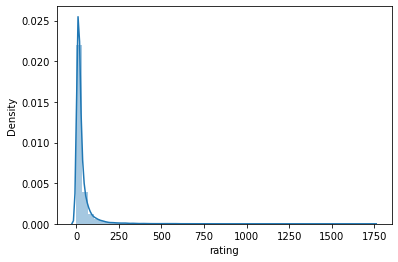

In [59]:
sns.distplot(book_stats['rating'])

In [61]:
book_stats[book_stats['rating']==1].shape

(4, 6)

In [62]:
book_stats[book_stats['rating']<10].shape

(5955, 6)

In [63]:
book_stats[book_stats['rating']<100].shape

(23837, 6)

The response matrix is sparse, as it typical in rating and recommender data sets. The fact that most books have fewer than 100 ratings means that separate models would be inappropriate unless they are bootstrapped from similar books.

3: What is the distribution of ratings for the books?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean rating', ylabel='Density'>

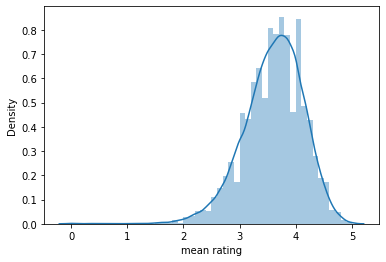

In [64]:
sns.distplot(book_stats['mean rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max rating', ylabel='count'>

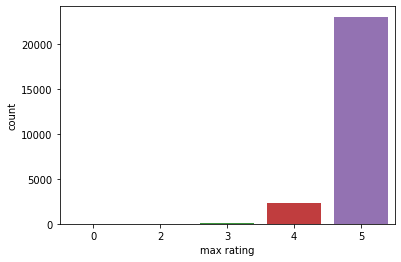

In [81]:
sns.countplot(book_stats['max rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='min rating', ylabel='count'>

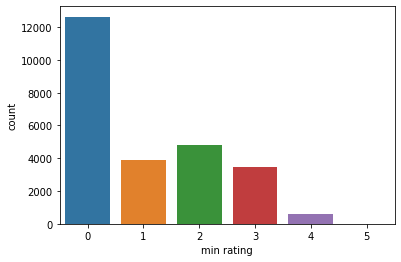

In [82]:
sns.countplot(book_stats['min rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stdev rating', ylabel='Density'>

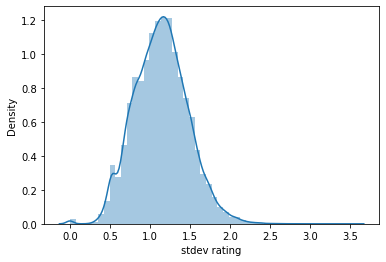

In [83]:
sns.distplot(book_stats['stdev rating'])

3a: For the books with 100 or more ratings, is the distribution the same?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean rating', ylabel='Density'>

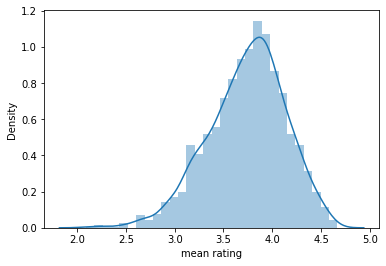

In [84]:
sns.distplot(book_stats[book_stats['rating']>=100]['mean rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max rating', ylabel='count'>

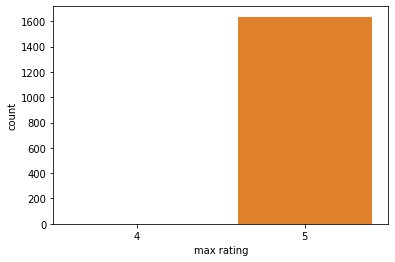

In [85]:
sns.countplot(book_stats[book_stats['rating']>=100]['max rating'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='min rating', ylabel='count'>

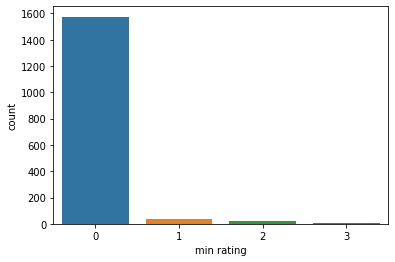

In [86]:
sns.countplot(book_stats[book_stats['rating']>=100]['min rating'])

The mean is about the same, and with more ratings they all have at least one 5, and have had people who didn't like them (<=3) rate them.

# Time
First, lets clean up the dates

In [88]:
train_df['read_at'][0]

'Sat Aug 26 12:05:52 -0700 2017'

In [89]:
train_df['started_at'][0]

'Tue Aug 15 13:23:18 -0700 2017'

-0700 UTC offset is mountain time

In [113]:
import datetime

def get_date(x):
    if isinstance(x, str) and len(x)>0:

        components = x.split(' ')
        mon = components[1]
        day = components[2]
        year = components[5]
        timestamp = components[3]
        utc = components[4]

        return '-'.join([year, mon, day]) + ' ' + timestamp + ' ' + utc

    return None
    

get_date(train_df['read_at'][0])

'2017-Aug-26 12:05:52 -0700'

In [119]:
def get_datetime(x):
    if isinstance(x, str): 
        return datetime.datetime.strptime(get_date(x), '%Y-%b-%d %H:%M:%S %z')
    return None

In [120]:
train_df['start_dt'] = train_df.apply(lambda x: get_datetime(x['started_at']), axis=1)
train_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,start_dt
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,2017-08-15 13:23:18-07:00
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,None
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,2017-03-17 23:45:40-07:00
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,None
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,2016-05-28 00:00:00-07:00


In [121]:
train_df['read_dt'] = train_df.apply(lambda x: get_datetime(x['read_at']), axis=1)
train_df['add_dt'] = train_df.apply(lambda x: get_datetime(x['date_added']), axis=1)
train_df['update_dt'] = train_df.apply(lambda x: get_datetime(x['date_updated']), axis=1)

In [123]:
train_df['start_day'] = train_df.apply(lambda x: x['started_at'][:3] if isinstance(x['started_at'], str) else None, axis=1)
train_df['read_day'] = train_df.apply(lambda x: x['read_at'][:3] if isinstance(x['read_at'], str) else None, axis=1)
train_df['add_day'] = train_df.apply(lambda x: x['date_added'][:3], axis=1)
train_df['update_day'] = train_df.apply(lambda x: x['date_updated'][:3], axis=1)

In [124]:
train_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,start_dt,read_dt,add_dt,update_dt,start_day,read_day,add_day,update_day
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,2017-08-15 13:23:18-07:00,2017-08-26 12:05:52-07:00,2017-07-30 07:44:10-07:00,2017-08-30 00:00:26-07:00,Tue,Sat,Sun,Wed
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,None,None,2016-12-05 10:46:44-08:00,2017-03-22 11:37:04-07:00,None,None,Mon,Wed
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,2017-03-17 23:45:40-07:00,2017-03-18 23:22:42-07:00,2016-11-15 11:29:22-08:00,2017-03-20 23:40:27-07:00,Fri,Sat,Tue,Mon
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,None,None,2016-11-09 17:37:04-08:00,2016-11-09 17:38:20-08:00,None,None,Wed,Wed
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,2016-05-28 00:00:00-07:00,2016-06-26 00:00:00-07:00,2016-04-25 09:31:23-07:00,2016-04-25 09:31:23-07:00,Sat,Sun,Mon,Mon


1: When are users adding books?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='add_day', ylabel='count'>

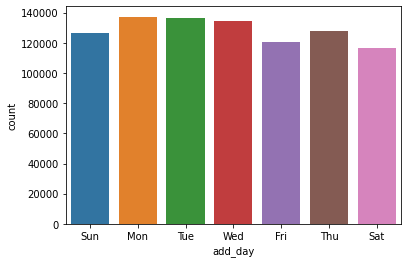

In [125]:
sns.countplot(train_df['add_day'])

<AxesSubplot:xlabel='add_day', ylabel='count'>

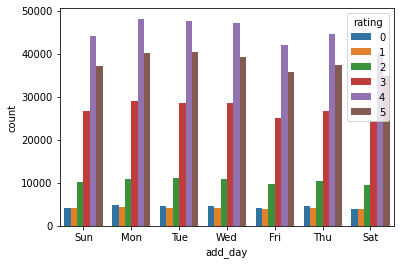

In [127]:
sns.countplot(train_df['add_day'], hue=train_df['rating'])

In [133]:
train_df['add_dt'].min()

datetime.datetime(2006, 8, 29, 11, 20, 5, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=61200)))

In [134]:
train_df['add_dt'].max()

datetime.datetime(2017, 10, 29, 2, 38, 42, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=61200)))

2: When are users updating books?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='update_day', ylabel='count'>

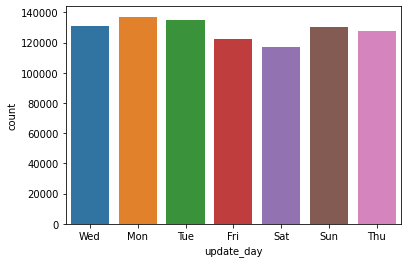

In [138]:
sns.countplot(train_df['update_day'])

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='update_day', ylabel='count'>

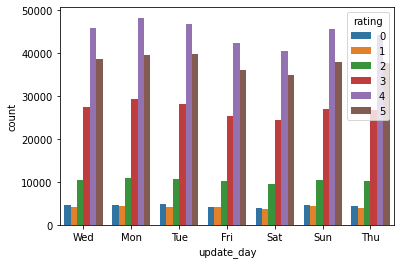

In [139]:
sns.countplot(train_df['update_day'], hue=train_df['rating'])

3: How much time passes between an add and an update?

In [141]:
train_df['update_delta'] = train_df.apply(lambda x: (x['update_dt'] - x['add_dt']).days, axis=1)

In [143]:
train_df['update_delta'].describe()

count    900000.000000
mean        284.820606
std         464.259574
min          -1.000000
25%           3.000000
50%          75.000000
75%         365.000000
max        3858.000000
Name: update_delta, dtype: float64

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='update_delta', ylabel='Density'>

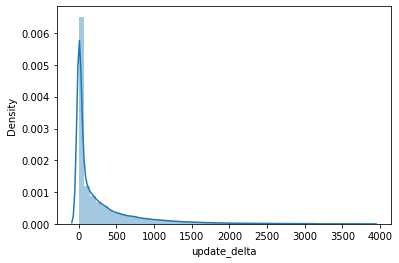

In [145]:
sns.distplot(train_df['update_delta']) 

<AxesSubplot:xlabel='rating', ylabel='update_delta'>

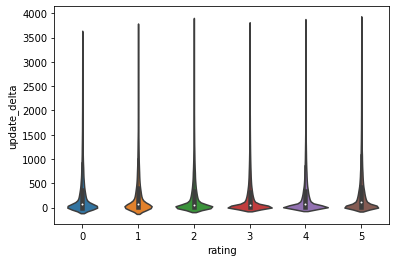

In [153]:
sns.violinplot(y=train_df['update_delta'], x=train_df['rating'])

In [154]:
train_df[['update_delta', 'rating']].corr()

,update_delta,rating
update_delta,1.000000,0.034364
rating,0.034364,1.000000


3: When are users starting books?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start_day', ylabel='count'>

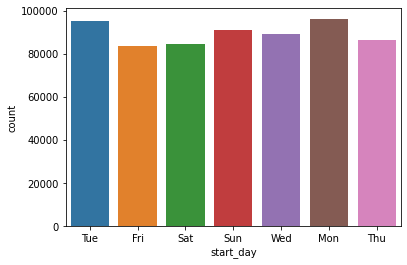

In [155]:
sns.countplot(train_df['start_day'])

4: When are users finishing books?

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='read_day', ylabel='count'>

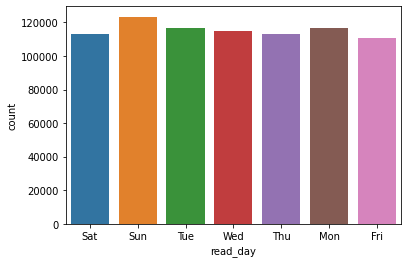

In [156]:
sns.countplot(train_df['read_day'])

<AxesSubplot:xlabel='read_day', ylabel='count'>

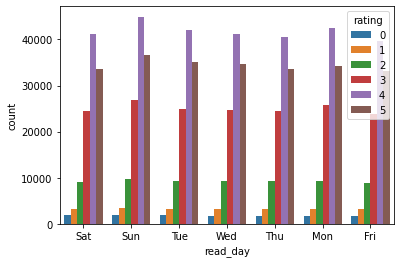

In [157]:
sns.countplot(x=train_df['read_day'], hue=train_df['rating'])

5: How long do users take to read books?

5a: what is the overlap of missing values for start and read dates?

In [160]:
train_df[(train_df['start_dt'].isna()) & (train_df['read_dt'].isna())].shape

(81570, 20)

In [162]:
train_df[(train_df['start_dt'].isna()) & ~(train_df['read_dt'].isna())].shape

(192727, 20)

In [163]:
train_df[~(train_df['start_dt'].isna()) & (train_df['read_dt'].isna())].shape

(10196, 20)

In [165]:
(train_df['start_dt'] == train_df['add_dt']).sum()

6450

In [167]:
(train_df['read_dt'] == train_df['update_dt']).sum()

149869

In [168]:
(train_df['read_dt'] == train_df['start_dt']).sum()

64112

In [169]:
(train_df['read_dt'] == train_df['add_dt']).sum()

417

In [171]:
def get_read_delta(start, end):
    if start and end:
        return (end - start).days
    return -1

def get_read_delta2(start, end, updated):
    if start and end:
        return (end - start).days
    if start:
        return (updated - start).days
    return -1
    

In [174]:
train_df['read_delta'] = train_df.apply(lambda x: get_read_delta(x['start_dt'], x['read_dt']), axis=1)
train_df['read_delta2'] = train_df.apply(lambda x: get_read_delta2(x['start_dt'], x['read_dt'], x['update_dt']), axis=1)

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='read_delta', ylabel='Density'>

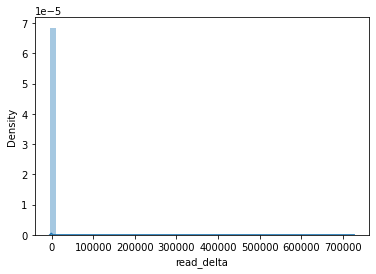

In [175]:
sns.distplot(train_df['read_delta']) 

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='read_delta2', ylabel='Density'>

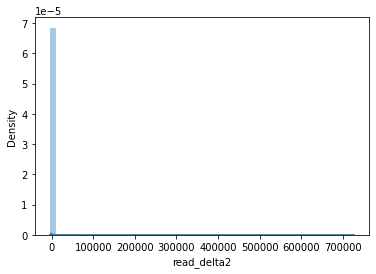

In [176]:
sns.distplot(train_df['read_delta2']) 

<AxesSubplot:xlabel='rating', ylabel='read_delta'>

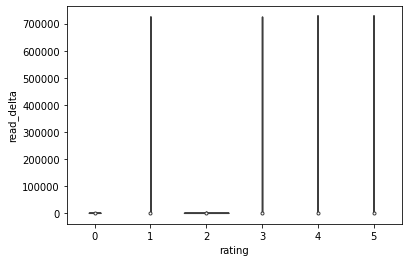

In [177]:
sns.violinplot(y=train_df['read_delta'], x=train_df['rating'])

<AxesSubplot:xlabel='rating', ylabel='read_delta2'>

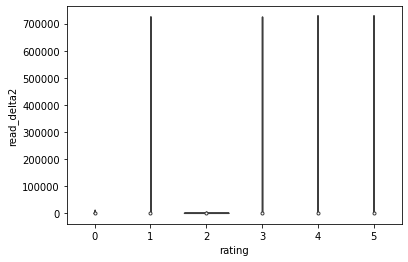

In [178]:
sns.violinplot(y=train_df['read_delta2'], x=train_df['rating'])

In [179]:
train_df.groupby('rating')['read_delta'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
0,30988.0,5.865851,54.316021,-1.0,-1.0,-1.0,0.0,2557.0
1,28718.0,32.408489,4286.110643,-1.0,-1.0,0.0,3.0,726300.0
2,72627.0,7.829609,52.193787,-1329.0,-1.0,1.0,4.5,4969.0
3,188972.0,14.979076,2363.025386,-1.0,-1.0,1.0,4.0,726103.0
4,313688.0,14.200097,2246.357263,-3840.0,-1.0,1.0,4.0,726105.0
5,265007.0,16.444483,2443.963229,-2199.0,-1.0,1.0,4.0,726105.0


# Reviews
1: How long are the reviews?

In [180]:
train_df['review_length_char'] = train_df.apply(lambda x: len(x['review_text']), axis=1)

In [181]:
train_df['review_length_words'] = train_df.apply(lambda x: len(x['review_text'].split(' ')), axis=1)

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_length_char', ylabel='Density'>

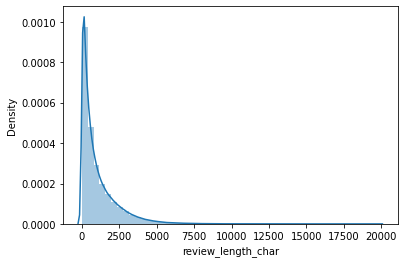

In [182]:
sns.distplot(train_df['review_length_char']) 

/Users/emily/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_length_words', ylabel='Density'>

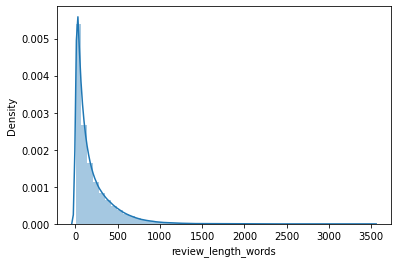

In [183]:
sns.distplot(train_df['review_length_words']) 

In [184]:
train_df[train_df['review_length_words']>1000].shape

(10856, 24)

<AxesSubplot:xlabel='rating', ylabel='review_length_words'>

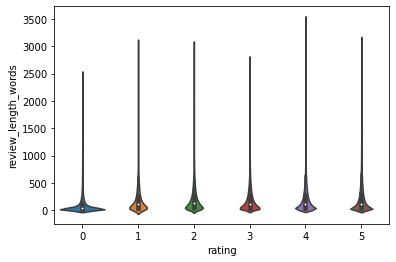

In [185]:
sns.violinplot(y=train_df['review_length_words'], x=train_df['rating'])

In [187]:
train_df[['review_length_char', 'review_length_words', 'rating']].corr()

,review_length_char,review_length_words,rating
review_length_char,1.000000,0.998592,0.051364
review_length_words,0.998592,1.000000,0.052936
rating,0.051364,0.052936,1.000000


In [199]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/emily/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [200]:
import wordcloud
import re
from nltk.corpus import stopwords

corpus = train_df['review_text'].tolist()

In [201]:
corpus[0]

'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. (view spoiler)[Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would happen if our SETI stations received a message - if we found someone was out there - and the person monitoring and answering the signal o

In [207]:
def text_clean(txt, stopwords):
    txt_list = txt.split(' ')
    txt_list = [re.sub('\W+','', i) for i in txt_list if i!= '\n']
    txt_list = [i.lower() for i in txt_list if i.lower() not in stopwords.words('english')]
    return ' '.join(txt_list)

In [210]:
corpus_new = [text_clean(i, stopwords) for i in corpus[:10000]]
corpus_new[0]

'special book started slow first third middle third started get interesting last third blew mind love good science fiction  pushes thinking things go 2015 hugo winner translated original chinese made interesting different way things ive read instance intermixing chinese revolutionary history  kept accusing people reactionaries etc book science aliens science described book impressive  book grounded physics pretty accurate far could tell view spoilerthough got folding protons 8 dimensions think making stuff  interesting think though would happen seti stations received message  found someone  person monitoring answering signal side disillusioned part book bit dark  would like think human reaction discovering alien civilization hostile would like enders game would band together like book unveiled trisolaran culture game smart way build empathy also understand theyve gone across many centuries know 3 body problem unsolvable math problem still dont get made game  maybe come next book loved 

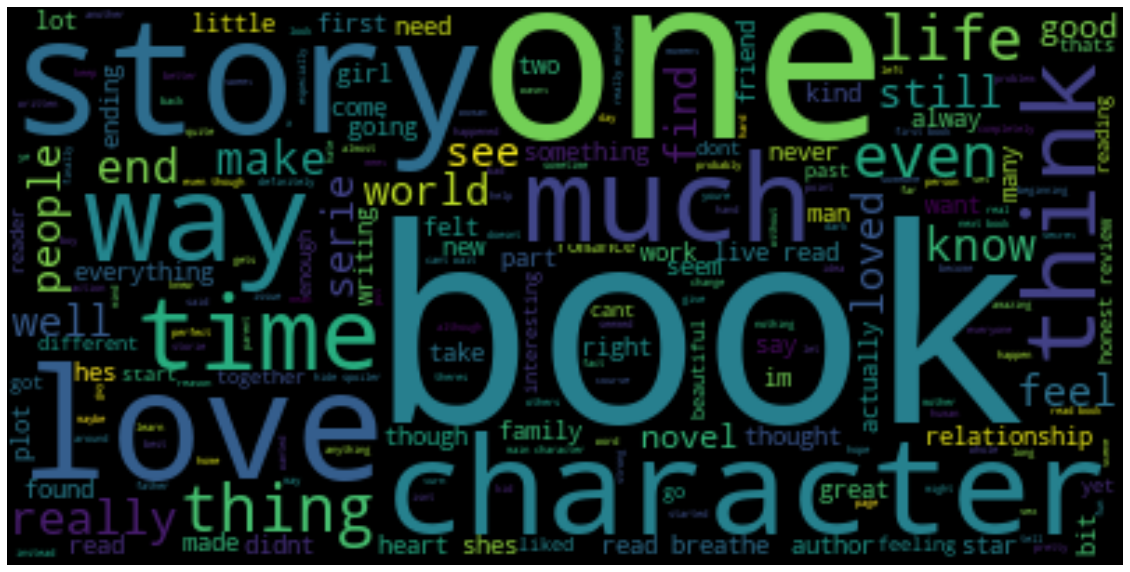

In [212]:
wc_text = ' '.join(corpus_new)

wc = wordcloud.WordCloud().generate(wc_text)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()



# Test Data

In [65]:
test_df = pd.read_csv('goodreads-books-reviews/goodreads_test.csv')

In [66]:
test_df.shape

(478033, 10)

In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478033 entries, 0 to 478032
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       478033 non-null  object
 1   book_id       478033 non-null  int64 
 2   review_id     478033 non-null  object
 3   review_text   478033 non-null  object
 4   date_added    478033 non-null  object
 5   date_updated  478033 non-null  object
 6   read_at       435555 non-null  object
 7   started_at    334989 non-null  object
 8   n_votes       478033 non-null  int64 
 9   n_comments    478033 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 36.5+ MB


1: How many cold start users are in the test data?

In [214]:
len(test_df['user_id'].unique())

6705

In [215]:
len(set(test_df['user_id'].tolist()).difference(train_df['user_id'].tolist()))

6704

In [216]:
len(set(test_df['user_id'].tolist()).intersection(train_df['user_id'].tolist()))

1

2: How many cold start books are in the test data?

In [217]:
len(test_df['book_id'].unique())

25399

In [218]:
len(set(test_df['book_id'].tolist()).difference(train_df['book_id'].tolist()))

1

In [219]:
len(set(test_df['book_id'].tolist()).intersection(train_df['book_id'].tolist()))

25398

Let's generate some random predictions to get a baseline

In [69]:
distribution = train_df.groupby('rating')['book_id'].count().reset_index()

In [70]:
distribution

,rating,book_id
0,0,30988
1,1,28718
2,2,72627
3,3,188972
4,4,313688
5,5,265007


In [71]:
total = distribution['book_id'].sum()
distribution['freq'] = distribution['book_id']/total

distribution

,rating,book_id,freq
0,0,30988,0.034431
1,1,28718,0.031909
2,2,72627,0.080697
3,3,188972,0.209969
4,4,313688,0.348542
5,5,265007,0.294452


In [73]:
np.random.seed(11)
predictions = [np.random.choice(distribution['rating'].tolist(), p=distribution['freq'].tolist()) 
               for _ in range(test_df.shape[0])]

In [74]:
len(predictions)

478033

In [78]:
baseline = pd.DataFrame({'review_id': test_df['review_id'].tolist(), 'rating': predictions})

In [79]:
baseline.head()

,review_id,rating
0,5c4df7e70e9b438c761f07a4620ccb7c,3
1,8eaeaf13213eeb16ad879a2a2591bbe5,0
2,dce649b733c153ba5363a0413cac988f,4
3,8a46df0bb997269d6834f9437a4b0a77,5
4,d11d3091e22f1cf3cb865598de197599,4


In [80]:
baseline.to_csv('predictions/random_baseline.csv', index=False)

This random baseline gets a mean F1 score of 0.26035